In [1]:
# importingvyg all the necessary libraries which is used in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
import sklearn.metrics as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

C:\Program Files\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
#reading the csv file
df = pd.read_csv('C:\\Users\Hp\Downloads\Dataset.csv')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,USD,RV,1.0,NaN,3187.86,20200421.0,NAA8,1.930797e+09,1
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,NaN,63.48,20191127.0,NAA8,1.930199e+09,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [4]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [5]:
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'],format='%Y%m%d')
df['document_create_date.1'].head()

0   2020-01-26
1   2019-07-22
2   2019-09-14
3   2020-03-30
4   2019-11-13
Name: document_create_date.1, dtype: datetime64[ns]

In [6]:
df['clear_date']=pd.to_datetime(df['clear_date'],format='%Y-%m-%d %H:%M:%S')
df['clear_date'].head()

0   2020-02-11
1   2019-08-08
2   2019-12-30
3          NaT
4   2019-11-25
Name: clear_date, dtype: datetime64[ns]

In [7]:
df['posting_date']=pd.to_datetime(df['posting_date'],format='%Y-%m-%d')
df['posting_date'].head()

0   2020-01-26
1   2019-07-22
2   2019-09-14
3   2020-03-30
4   2019-11-13
Name: posting_date, dtype: datetime64[ns]

In [8]:
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['due_in_date'].head()

0   2020-02-10
1   2019-08-11
2   2019-09-29
3   2020-04-10
4   2019-11-28
Name: due_in_date, dtype: datetime64[ns]

In [9]:
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')
df['baseline_create_date'].head()

0   2020-01-26
1   2019-07-22
2   2019-09-14
3   2020-03-31
4   2019-11-13
Name: baseline_create_date, dtype: datetime64[ns]

In [10]:
# looking at the converted data-types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  int64         
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  float6

In [11]:
# ### Dropping columns with ALL NULL values.
df.dropna(axis=1,how='all',inplace=True)
df.shape

(50000, 18)

In [12]:
# We dropped area_business

# ### Dropping null values in invoice id
# invoice id has only 49997 unique values of 50000. So let's analyse it a bit.
df["document type"].value_counts()

RV    49994
X2        6
Name: document type, dtype: int64

In [13]:
# We see that where the invoice id is missing the document type is X2 and posting date is different from document create date. Since their are only 3 values and invoice_id needs to be unique we can drop these rows
df.dropna(axis=0,subset=['invoice_id'],inplace=True)
df.reset_index(drop=True,inplace=True)
df.shape
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,20200125,2020-01-26,2020-02-10,USD,RV,1.0,54273.28,2020-01-26,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,20190722,2019-07-22,2019-08-11,USD,RV,1.0,79656.60,2019-07-22,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,20190914,2019-09-14,2019-09-29,USD,RV,1.0,2253.86,2019-09-14,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,20200330,2020-03-30,2020-04-10,CAD,RV,1.0,3299.70,2020-03-31,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,20191113,2019-11-13,2019-11-28,USD,RV,1.0,33133.29,2019-11-13,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,20200417,2020-04-21,2020-05-06,USD,RV,1.0,3187.86,2020-04-21,NAA8,1.930797e+09,1
49990,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,20190814,2019-08-15,2019-08-30,USD,RV,1.0,6766.54,2019-08-15,NAH4,1.929744e+09,0
49991,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,20200218,2020-02-19,2020-03-05,USD,RV,1.0,6120.86,2020-02-19,NAA8,1.930537e+09,0
49992,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,20191126,2019-11-27,2019-12-12,USD,RV,1.0,63.48,2019-11-27,NAA8,1.930199e+09,0


In [14]:
# ### Checking for unique values in each column
for cols in df.columns:   
   print(f"{cols} - {df[f'{cols}'].nunique()}")

business_code - 6
cust_number - 1424
name_customer - 4193
clear_date - 403
buisness_year - 2
doc_id - 48833
posting_date - 506
document_create_date - 507
document_create_date.1 - 506
due_in_date - 547
invoice_currency - 2
document type - 1
posting_id - 1
total_open_amount - 44344
baseline_create_date - 506
cust_payment_terms - 74
invoice_id - 48833
isOpen - 2


In [15]:
# There is only 1 unique value in document type and posting_id. We can drop these.
unique_cols =  [x for x in df.columns if df[x].nunique()==1] 
print(unique_cols)
df.drop(unique_cols,axis=1,inplace=True)
df.columns

['document type', 'posting_id']


Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'total_open_amount', 'baseline_create_date', 'cust_payment_terms',
       'invoice_id', 'isOpen'],
      dtype='object')

In [16]:
# Now let's check for NULL values again.
df.isnull().any()


business_code             False
cust_number               False
name_customer             False
clear_date                 True
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                False
isOpen                    False
dtype: bool

In [17]:
# No null(except clear-date) values so moving on to removing duplicate columns.

# ### Duplicate column removal
# function to find duplicate columns
def findDuplicateColumns(df):
    duplicatecolumns=set()
    for x in range(df.shape[1]):
        col1=df.iloc[:,x]
        for y in range(x+1,df.shape[1]):
            col2=df.iloc[:,y]
            if col1.equals(col2):
                duplicatecolumns.add(df.columns.values[x])
    return list(duplicatecolumns)

In [18]:
# Using user-defined function as the in-built function was computationally expensive.

dr=findDuplicateColumns(df)
dr


['doc_id', 'posting_date']

In [19]:
df.drop(columns=dr,inplace=True) 

In [20]:
# We dropped posting_date and doc_id.
# 
# Now, to avoid discrepancy between document_create_date and document_create_date.1 we drop document_create_date and instead use document_create_date.1
df.drop(columns=['document_create_date'],inplace=True)


In [21]:
# Also, invoice id is unique for each transaction and don't affect the sales, so we drop it.
df.drop(columns=['invoice_id'],inplace=True) 
df

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4,0
1,U001,0200980828,BEN E,2019-08-08,2019.0,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1,0
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8,0
3,CA02,0140105686,SYSC llc,NaT,2020.0,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49989,U001,0200561861,CO corporation,NaT,2020.0,2020-04-21,2020-05-06,USD,3187.86,2020-04-21,NAA8,1
49990,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,2019-08-15,2019-08-30,USD,6766.54,2019-08-15,NAH4,0
49991,U001,0200772595,SAFEW associates,2020-03-05,2020.0,2020-02-19,2020-03-05,USD,6120.86,2020-02-19,NAA8,0
49992,U001,0200726979,BJ'S llc,2019-12-12,2019.0,2019-11-27,2019-12-12,USD,63.48,2019-11-27,NAA8,0


In [22]:
# # TARGET VARIABLE AND SORT
# Our model cant take in dates for prediction so our target column will not be clear_date. Instead it will be the delay column as delay will be in int format which our model can predict.
# 
# clear_date - due_date will tell us how much delay was there in paying. 
#  
#  "-" indicates it has been paid off before due date. 
#  "+" indicates it has been paid off after the due date
df['delay']=(df['clear_date']-df['due_in_date']).dt.days

In [23]:
# Sorting in ascending order by document_create_date.1
df.sort_values(by='document_create_date.1',inplace=True) # sorting in ascending order by document_create_date.1
df

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
43098,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,14559.00,2018-12-30,NAH4,0,-5.0
32817,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,25749.68,2018-12-30,NAH4,0,-5.0
44611,U001,0200726979,BJ'S systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,58.18,2018-12-30,NAA8,0,1.0
15510,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,4890.99,2018-12-30,NAH4,0,-5.0
1268,U001,0200769623,WAL-MAR associates,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,9785.88,2018-12-30,NAH4,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,U001,0200541916,VF G corp,NaT,2020.0,2020-05-15,2020-05-30,USD,34301.32,2020-05-15,NAA8,1,NaN
7528,U001,0200759878,SA associates,NaT,2020.0,2020-05-17,2020-06-01,USD,22835.50,2020-05-17,NAH4,1,NaN
48269,U001,0200915438,GROC foundation,NaT,2020.0,2020-05-18,2020-06-02,USD,1232.00,2020-05-18,NAA8,1,NaN
411,CA02,0100027744,OMEGA AD in,NaT,2020.0,2020-05-19,2020-05-19,CAD,7035.00,2020-05-19,CAB1,1,NaN


In [24]:
# # SPLITTING
# Creating test set on null clear_date
test_data = df[df.clear_date.isnull()].reset_index()
test_data.drop(columns=['index'],inplace=True)
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR in,NaT,2020.0,2020-02-27,2020-03-13,USD,32922.51,2020-02-27,NAH4,1,NaN
1,U001,0200806580,BE systems,NaT,2020.0,2020-02-27,2020-03-13,USD,4827.34,2020-02-27,NAA8,1,NaN
2,U001,0200769623,WAL-MAR trust,NaT,2020.0,2020-02-27,2020-03-13,USD,14706.47,2020-02-27,NAH4,1,NaN
3,U001,0200726979,BJ'S us,NaT,2020.0,2020-02-27,2020-03-13,USD,413.83,2020-02-27,NAA8,1,NaN
4,U001,0200014556,ALBER corporation,NaT,2020.0,2020-02-27,2020-05-02,USD,15651.65,2020-02-27,NAGD,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200541916,VF G corp,NaT,2020.0,2020-05-15,2020-05-30,USD,34301.32,2020-05-15,NAA8,1,NaN
9996,U001,0200759878,SA associates,NaT,2020.0,2020-05-17,2020-06-01,USD,22835.50,2020-05-17,NAH4,1,NaN
9997,U001,0200915438,GROC foundation,NaT,2020.0,2020-05-18,2020-06-02,USD,1232.00,2020-05-18,NAA8,1,NaN
9998,CA02,0100027744,OMEGA AD in,NaT,2020.0,2020-05-19,2020-05-19,CAD,7035.00,2020-05-19,CAB1,1,NaN


In [25]:
ts = test_data.copy()

In [26]:
# Splitting test_set into x_test and y_test
y_test = test_data["delay"]
y_test

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9995   NaN
9996   NaN
9997   NaN
9998   NaN
9999   NaN
Name: delay, Length: 10000, dtype: float64

In [27]:
x_test = test_data.iloc[:,:-1].copy()
x_test

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200769623,WAL-MAR in,NaT,2020.0,2020-02-27,2020-03-13,USD,32922.51,2020-02-27,NAH4,1
1,U001,0200806580,BE systems,NaT,2020.0,2020-02-27,2020-03-13,USD,4827.34,2020-02-27,NAA8,1
2,U001,0200769623,WAL-MAR trust,NaT,2020.0,2020-02-27,2020-03-13,USD,14706.47,2020-02-27,NAH4,1
3,U001,0200726979,BJ'S us,NaT,2020.0,2020-02-27,2020-03-13,USD,413.83,2020-02-27,NAA8,1
4,U001,0200014556,ALBER corporation,NaT,2020.0,2020-02-27,2020-05-02,USD,15651.65,2020-02-27,NAGD,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200541916,VF G corp,NaT,2020.0,2020-05-15,2020-05-30,USD,34301.32,2020-05-15,NAA8,1
9996,U001,0200759878,SA associates,NaT,2020.0,2020-05-17,2020-06-01,USD,22835.50,2020-05-17,NAH4,1
9997,U001,0200915438,GROC foundation,NaT,2020.0,2020-05-18,2020-06-02,USD,1232.00,2020-05-18,NAA8,1
9998,CA02,0100027744,OMEGA AD in,NaT,2020.0,2020-05-19,2020-05-19,CAD,7035.00,2020-05-19,CAB1,1


In [28]:
# ### Creating a seprate data frame out of which we will extract val1, val2 and final train set.
# WHOLE DATA ---> [TRAIN_DATA + VAL1 (1.5 MONTHS) + VAL2 (1.5 MONTHS)] + TEST_DATA
train_data2 = df[df.clear_date.notnull()].reset_index() #train set on non-null clear date
train_data2.drop(columns=['index'],inplace=True)
train_data2

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,14559.00,2018-12-30,NAH4,0,-5.0
1,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,25749.68,2018-12-30,NAH4,0,-5.0
2,U001,0200726979,BJ'S systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,58.18,2018-12-30,NAA8,0,1.0
3,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,4890.99,2018-12-30,NAH4,0,-5.0
4,U001,0200769623,WAL-MAR associates,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,9785.88,2018-12-30,NAH4,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39989,U001,0200571849,US in,2020-03-11,2020.0,2020-02-26,2020-03-12,USD,44450.82,2020-02-26,NAA8,0,-1.0
39990,U001,0200769623,WAL-MAR associates,2020-03-09,2020.0,2020-02-26,2020-03-12,USD,67471.47,2020-02-26,NAH4,0,-3.0
39991,U001,0200418007,AM associates,2020-03-19,2020.0,2020-02-27,2020-03-13,USD,10349.36,2020-02-27,NAA8,0,6.0
39992,U001,0200759878,SA corp,2020-03-13,2020.0,2020-02-27,2020-03-13,USD,49290.19,2020-02-27,NAH4,0,0.0


In [29]:
# Making use of offset to find date 1.5 months prior to 2020-02-27
x = train_data2['document_create_date.1'].iloc[-1] - pd.DateOffset(months=1, days=15)
y = train_data2['document_create_date.1'].loc[train_data2['document_create_date.1'] <= x].iloc[-1]
print(y) 
train_data2['document_create_date.1'].loc[train_data2['document_create_date.1'] == y].last_valid_index()


2020-01-12 00:00:00


35838

In [30]:
# This gives the date which is 1.5 months prior to 2020-02-27.
# 
# val2 will start from 2020-01-13 to 2020-02-27
val2 = train_data2.iloc[40519: , :].copy()
val2.reset_index(drop=True,inplace=True)
val2

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay


In [31]:
# Removing val2 from train_data2 and storing into new dataframe to extract val1.
train_data1 = pd.concat([train_data2, val2]).drop_duplicates(keep=False)
train_data1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,14559.00,2018-12-30,NAH4,0,-5.0
1,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,25749.68,2018-12-30,NAH4,0,-5.0
2,U001,0200726979,BJ'S systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,58.18,2018-12-30,NAA8,0,1.0
3,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,4890.99,2018-12-30,NAH4,0,-5.0
4,U001,0200769623,WAL-MAR associates,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,9785.88,2018-12-30,NAH4,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39989,U001,0200571849,US in,2020-03-11,2020.0,2020-02-26,2020-03-12,USD,44450.82,2020-02-26,NAA8,0,-1.0
39990,U001,0200769623,WAL-MAR associates,2020-03-09,2020.0,2020-02-26,2020-03-12,USD,67471.47,2020-02-26,NAH4,0,-3.0
39991,U001,0200418007,AM associates,2020-03-19,2020.0,2020-02-27,2020-03-13,USD,10349.36,2020-02-27,NAA8,0,6.0
39992,U001,0200759878,SA corp,2020-03-13,2020.0,2020-02-27,2020-03-13,USD,49290.19,2020-02-27,NAH4,0,0.0


In [32]:
x2 = train_data1['document_create_date.1'].iloc[-1] - pd.DateOffset(months=1, days=15)
y2 = train_data1['document_create_date.1'].loc[train_data1['document_create_date.1'] <= x2].iloc[-1]
print(y2)
train_data1['document_create_date.1'].loc[train_data1['document_create_date.1'] == y2].last_valid_index() 


2020-01-12 00:00:00


35838

In [33]:
# This gives the date which is 1.5 months prior to 2020-01-13 (start of val2).
# 
# val1 will start from 2019-11-28 to 2020-01-12.
val1 = train_data1.iloc[37251: , :].copy()
val1.reset_index(drop=True,inplace=True)
val1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR foundation,2020-02-27,2020.0,2020-02-15,2020-03-01,USD,15691.50,2020-02-15,NAH4,0,-3.0
1,U001,0200769623,WAL-MAR trust,2020-03-24,2020.0,2020-02-15,2020-03-01,USD,433.09,2020-02-15,NAH4,0,23.0
2,U001,0200769623,WAL-MAR co,2020-02-25,2020.0,2020-02-15,2020-03-01,USD,59912.28,2020-02-15,NAH4,0,-5.0
3,U001,0200744019,TARG corporation,2020-03-04,2020.0,2020-02-15,2020-03-01,USD,19258.26,2020-02-15,NAA8,0,3.0
4,CA02,0140106408,WAL-M associates,2020-03-11,2020.0,2020-02-15,2020-02-25,CAD,97240.47,2020-02-15,CA10,0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,U001,0200571849,US in,2020-03-11,2020.0,2020-02-26,2020-03-12,USD,44450.82,2020-02-26,NAA8,0,-1.0
1043,U001,0200769623,WAL-MAR associates,2020-03-09,2020.0,2020-02-26,2020-03-12,USD,67471.47,2020-02-26,NAH4,0,-3.0
1044,U001,0200418007,AM associates,2020-03-19,2020.0,2020-02-27,2020-03-13,USD,10349.36,2020-02-27,NAA8,0,6.0
1045,U001,0200759878,SA corp,2020-03-13,2020.0,2020-02-27,2020-03-13,USD,49290.19,2020-02-27,NAH4,0,0.0


In [34]:
# Removing val1 from the dataframe and making the final train set.
train_data = pd.concat([train_data1, val1]).drop_duplicates(keep=False)
train_data

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,14559.00,2018-12-30,NAH4,0,-5.0
1,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,25749.68,2018-12-30,NAH4,0,-5.0
2,U001,0200726979,BJ'S systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,58.18,2018-12-30,NAA8,0,1.0
3,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,4890.99,2018-12-30,NAH4,0,-5.0
4,U001,0200769623,WAL-MAR associates,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,9785.88,2018-12-30,NAH4,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38890,U001,0200148860,DOLLA in,2020-03-02,2020.0,2020-02-15,2020-03-01,USD,14954.97,2020-02-15,NAA8,0,1.0
38891,U001,0200769623,WAL-MAR corporation,2020-02-26,2020.0,2020-02-15,2020-03-01,USD,62650.73,2020-02-15,NAH4,0,-4.0
38892,U001,0200769623,WAL-MAR foundation,2020-03-03,2020.0,2020-02-15,2020-03-01,USD,12400.51,2020-02-15,NAH4,0,2.0
38893,U001,0200759878,SA foundation,2020-03-23,2020.0,2020-02-15,2020-03-31,USD,114606.53,2020-02-15,NAWP,0,-8.0


In [35]:
# We successfully splitted the data into train, val1, val2, and test set.

# # EDA on train set

# ## UNIVARIATE ANALYSIS
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37251 entries, 0 to 38894
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           37251 non-null  object        
 1   cust_number             37251 non-null  object        
 2   name_customer           37251 non-null  object        
 3   clear_date              37251 non-null  datetime64[ns]
 4   buisness_year           37251 non-null  float64       
 5   document_create_date.1  37251 non-null  datetime64[ns]
 6   due_in_date             37251 non-null  datetime64[ns]
 7   invoice_currency        37251 non-null  object        
 8   total_open_amount       37251 non-null  float64       
 9   baseline_create_date    37251 non-null  datetime64[ns]
 10  cust_payment_terms      37251 non-null  object        
 11  isOpen                  37251 non-null  int64         
 12  delay                   37251 non-null  float6

In [36]:
# We can see there are no null values in our dataset. There are only 3 continuous variable column i.e. buisness_year, total_open_amount and delay,

# ### business_code
# company code of the account
train_data.business_code.value_counts()

U001    33661
CA02     2992
U013      475
U002      112
U005        9
U007        2
Name: business_code, dtype: int64

<AxesSubplot:xlabel='business_code', ylabel='count'>

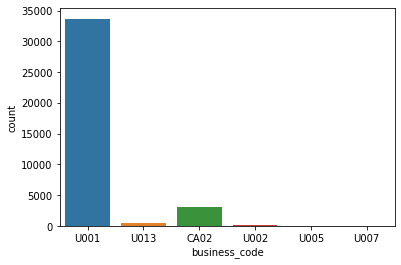

In [37]:
sns.countplot(x = train_data['business_code'])

In [38]:
# As there are only 6 values we can apply encoding on it later.

# ### cust_number
# customer number given to all the customers of the Account.
train_data.cust_number.value_counts()

0200769623    8326
0200726979    1391
0200762301    1104
0200759878     973
0200794332     834
              ... 
100051641        1
0200593992       1
0140105845       1
200468954        1
0100010880       1
Name: cust_number, Length: 1322, dtype: int64

In [39]:
len(dict(train_data.cust_number.value_counts()))

1322

In [40]:
# There are 1359 unique customers or comapny that we have transactions with.
# 
# cust_number represent account no of different companies. For eg WAL-MAR has many varities that is WAL-MAR corporation, WAL-MAR systems etc but they have the same cust_number.

# ### name_customer
# name of the customer.
train_data.name_customer.value_counts()

WAL-MAR trust          881
WAL-MAR in             846
WAL-MAR                844
WAL-MAR corporation    825
WAL-MAR corp           822
                      ... 
KWI corp                 1
BELL corporation         1
SUPER associates         1
HILL llc                 1
DOLLARA us               1
Name: name_customer, Length: 3803, dtype: int64

In [41]:
# Companies Like WAL-MAR, WAL-MAR systems, etc belong to company WAL-MAR and have a unique customer_num to their name hence this column will be dropped.

# ### clear_date
# The date on which the customer clears an invoice, or in simple terms, they make the full payment.
train_data.clear_date.min()


Timestamp('2019-01-03 00:00:00')

In [42]:
train_data.clear_date.max()

Timestamp('2020-05-22 00:00:00')

In [43]:
# Our clear_date ranges for 362 days.
clear_month = train_data.clear_date.dt.month
clear_month.value_counts()

2     4636
5     3259
4     3118
3     3115
12    3072
10    3008
11    2981
8     2944
7     2927
9     2798
1     2714
6     2679
Name: clear_date, dtype: int64

<AxesSubplot:xlabel='clear_date', ylabel='count'>

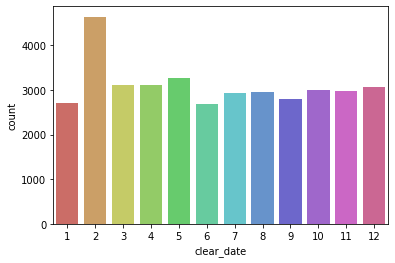

In [44]:
sns.countplot(x=clear_month, palette="hls")

In [45]:
# May is the month where the companies completed their maximum transations.

# ### buisness_year
# indicates the year of clear date
train_data.buisness_year.value_counts()

2019.0    33217
2020.0     4034
Name: buisness_year, dtype: int64

In [46]:
# As there is only 1 buisness_year we will drop this column.

# ### document_create_date.1
# The date on which the invoice document was created
train_data["document_create_date.1"].min()


Timestamp('2018-12-30 00:00:00')

In [47]:
train_data["document_create_date.1"].max()

Timestamp('2020-02-15 00:00:00')

In [48]:
# It ranges for 334 days, almost less than a year

# ### invoice_currency
# The currency of the invoice amount in the document for the invoice
train_data["invoice_currency"].value_counts()

USD    34257
CAD     2994
Name: invoice_currency, dtype: int64

In [49]:
# As there are two currencies involved, we can convert either one them. However, as there is not much difference between USD and CAD, there is not much use of converting them.

# ### total_open_amount
# The amount that is yet to be paid for that invoice
train_data['total_open_amount'].describe().apply(lambda x: format(x,'f'))


count     37251.000000
mean      32129.565016
std       39739.526977
min           0.790000
25%        4700.870000
50%       17277.520000
75%       46553.915000
max      668593.360000
Name: total_open_amount, dtype: object

In [50]:
# Automatically binning the amount using pd.qcut.
open_amount_bins = pd.qcut(train_data['total_open_amount'],q=10)
open_amount_bins.value_counts()


(0.789, 813.21]          3729
(2957.58, 7003.98]       3725
(7003.98, 12838.8]       3725
(12838.8, 17277.52]      3725
(17277.52, 25341.75]     3725
(25341.75, 39288.25]     3725
(39288.25, 54891.76]     3725
(54891.76, 81933.33]     3725
(81933.33, 668593.36]    3725
(813.21, 2957.58]        3722
Name: total_open_amount, dtype: int64

In [51]:
amount_bins = [0,5000,10000,50000,100000,1100000]
new_open_amount_bin = pd.cut(train_data['total_open_amount'], bins = amount_bins)


<AxesSubplot:xlabel='total_open_amount', ylabel='count'>

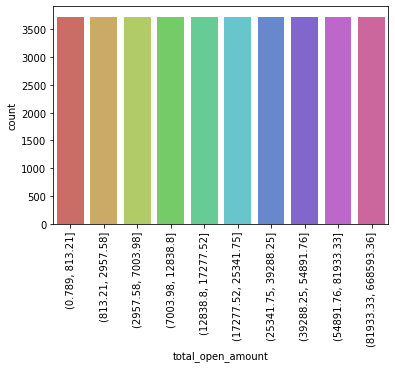

In [52]:
plt.xticks(fontsize=10, rotation=90)
sns.countplot(x=open_amount_bins, palette="hls")


In [53]:
# The number of companies in each distribution is same.

# ### baseline_create_date
# The date on which the Invoice was created.
train_data.loc[train_data["document_create_date.1"]!=train_data["baseline_create_date"]]


,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
30,CA02,0140106181,THE corp,2019-05-01,2019.0,2018-12-30,2019-01-10,CAD,117723.35,2018-12-31,CA10,0,111.0
92,CA02,0140104423,METRO,2019-01-18,2019.0,2018-12-31,2019-01-12,CAD,71231.97,2019-01-02,CA10,0,6.0
127,CA02,0140104340,COLABOR systems,2019-01-17,2019.0,2018-12-31,2019-01-13,CAD,1824.47,2019-01-03,CA10,0,4.0
167,CA02,0140105785,SHOPPE trust,2019-01-25,2019.0,2019-01-02,2019-01-21,CAD,45710.70,2019-01-11,CA10,0,4.0
169,CA02,0140104409,LOB corp,2019-01-18,2019.0,2019-01-02,2019-01-14,CAD,259891.02,2019-01-04,CA10,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38814,CA02,0140106231,PRATT trust,2020-03-02,2020.0,2020-02-14,2020-03-01,CAD,86263.31,2020-02-20,CA10,0,1.0
38826,CA02,0140104440,SO in,2020-03-02,2020.0,2020-02-14,2020-02-27,CAD,209547.33,2020-02-17,CA10,0,4.0
38856,CA02,0140106408,WAL-M llc,2020-03-09,2020.0,2020-02-15,2020-03-04,CAD,178304.93,2020-02-23,CA10,0,5.0
38862,CA02,0140104429,COSTCO trust,2020-03-04,2020.0,2020-02-15,2020-02-28,CAD,1997.12,2020-02-18,CA10,0,5.0


In [54]:
# Baseline create date and document create date are same except if the company is canadian there is a delay in filing the document and creating an invoice. 
# 
# It's not that important to our model so we'll drop it.

# ### cust_payment_terms
# Business terms and agreements between customers and accounts on discounts and days of payment.
train_data.cust_payment_terms.value_counts()


NAA8    14888
NAH4     9864
CA10     2895
NAC6     1244
NAM4     1026
        ...  
NATV        1
NAUY        1
NAD8        1
NABD        1
CA60        1
Name: cust_payment_terms, Length: 70, dtype: int64

In [55]:
len(dict(train_data.cust_number.value_counts()))


1322

In [56]:
# It is same as cust_number.

# ### isOpen
# - Tells whether a transaction is open or closed
train_data.isOpen.value_counts()

0    37251
Name: isOpen, dtype: int64

In [57]:
# isOpen is 0 for all the train set as all the invoices has been closed. So we can drop this column.

# ### Delay
# The negative delay specifies that the amount was cleared before the due date and thus there was no delay. Therefore we have capped the negative values to 0.
train_data.delay[train_data.delay<0].count()


13729

In [58]:
train_data['delay']=train_data.delay.apply(lambda x: 0 if x<0 else x)
train_data.delay[train_data.delay<0].count()

0

In [59]:
train_data.delay.describe()


count    37251.000000
mean         2.718477
std          9.138911
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        204.000000
Name: delay, dtype: float64

In [60]:
# ## MULTIVARIATE ANALYSIS

# ### Relation b/w business_code with invoice_currency
train_data['invoice_currency'].value_counts()

USD    34257
CAD     2994
Name: invoice_currency, dtype: int64

In [61]:
train_data.groupby("business_code").invoice_currency.value_counts()


business_code  invoice_currency
CA02           CAD                  2992
U001           USD                 33661
U002           USD                   112
U005           USD                     9
U007           USD                     2
U013           USD                   473
               CAD                     2
Name: invoice_currency, dtype: int64

In [62]:
# We see that business code first letter describes in which currency the transaction took place except for 2 entries. Let's explore them further
train_data.groupby("invoice_currency").business_code.value_counts()

invoice_currency  business_code
CAD               CA02              2992
                  U013                 2
USD               U001             33661
                  U013               473
                  U002               112
                  U005                 9
                  U007                 2
Name: business_code, dtype: int64

In [63]:
# business_code U013 is an US based company but paying in CAD
temp = train_data.loc[train_data['business_code'] == 'U013']
temp.loc[temp['invoice_currency']=='CAD']

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
704,U013,0100052318,PRATT' systems,2019-02-23,2019.0,2019-01-08,2019-02-07,CAD,3880.79,2019-01-08,NAVE,0,16.0
32790,U013,0100052318,PRATT' co,2019-12-24,2019.0,2019-11-26,2019-12-26,CAD,3373.05,2019-11-26,NAVE,0,0.0


In [64]:
# We see that only PRATT company is the only US based company paying in CAD.
# 
# Morever they are only 2 transactions so it's not as significant. They don't even have any delay so this won't affect our model.

# ### Relation between total_open_amount and delay
delay_bins = [0,15,30,45,60,300]
delay_bucket = pd.cut(train_data['delay'], bins = delay_bins)
pd.crosstab(index = new_open_amount_bin, columns =delay_bucket)

delay,"(0, 15]","(15, 30]","(30, 45]","(45, 60]","(60, 300]"
total_open_amount,,,,,
"(0, 5000]",3162,98,93,82,97
"(5000, 10000]",1446,64,69,42,26
"(10000, 50000]",6128,269,169,99,69
"(50000, 100000]",2472,55,18,9,14
"(100000, 1100000]",1153,19,18,7,4


<AxesSubplot:xlabel='total_open_amount', ylabel='count'>

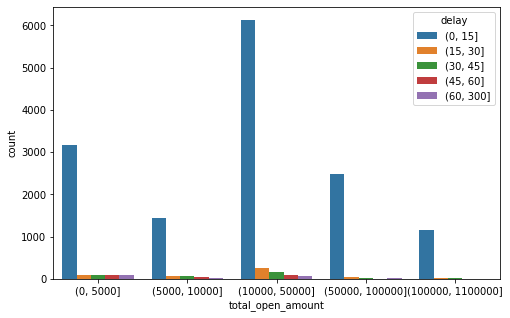

In [65]:
plt.figure(figsize=(8,5))
plt.xlabel("Amount bin")
sns.countplot(x = new_open_amount_bin, hue=delay_bucket)

In [66]:
# As we can see from the graph for each bucket the amount was returned in 0-15 delay days.
train_data.corr()

,buisness_year,total_open_amount,isOpen,delay
buisness_year,1.000000,-0.009201,NaN,0.005035
total_open_amount,-0.009201,1.000000,NaN,-0.042652
isOpen,NaN,NaN,NaN,NaN
delay,0.005035,-0.042652,NaN,1.000000


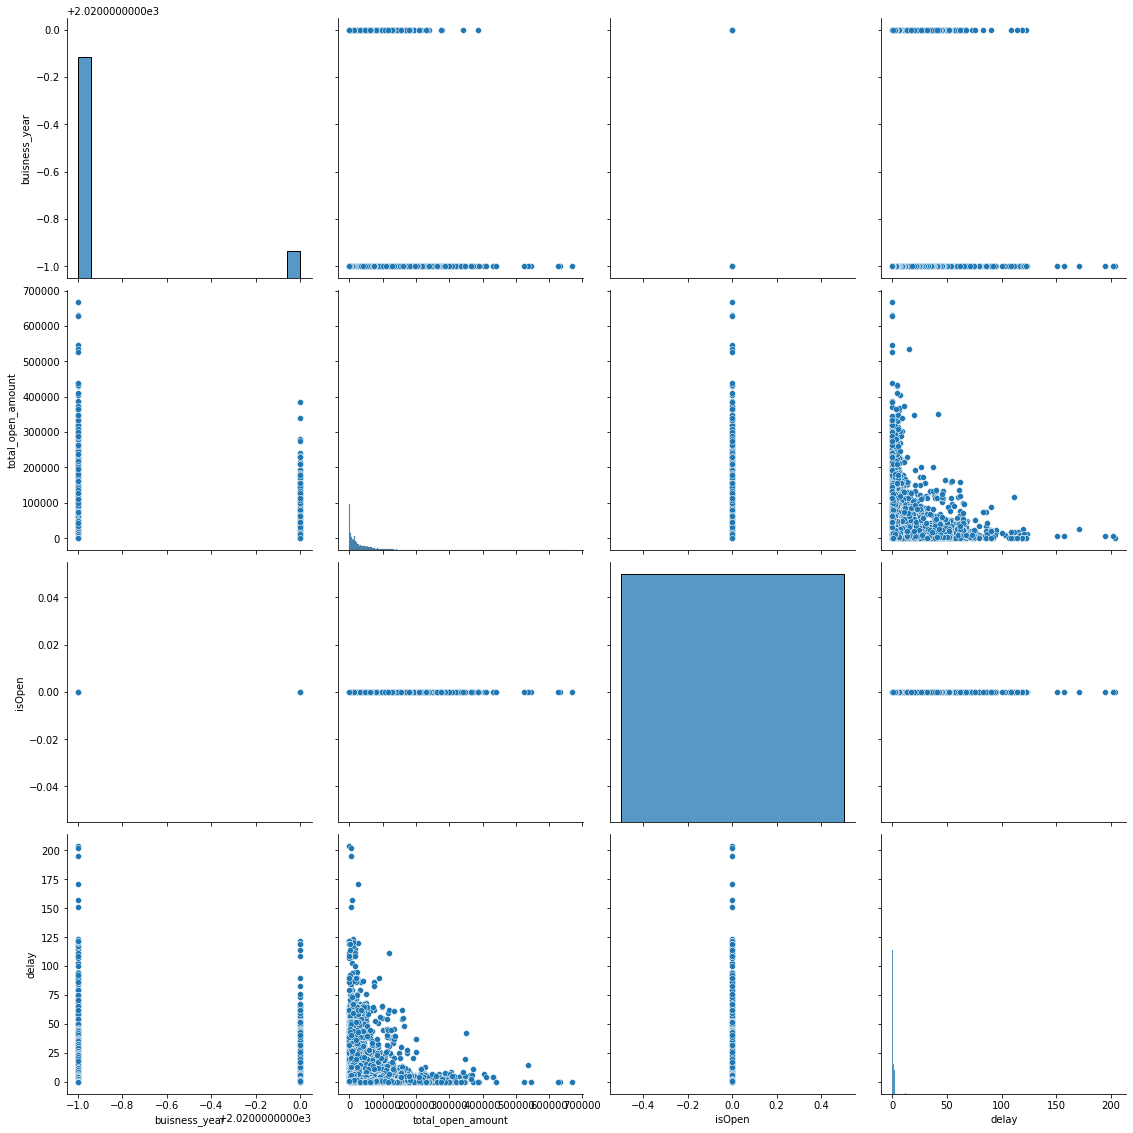

In [67]:
sns.pairplot(train_data, height=4)

In [68]:
# We can infer: The total open amount decreses as the delay increases. There is negative co-relation.

# # FEATURE ENGINEERING
train_data.drop(columns=['business_code', 'name_customer','buisness_year','invoice_currency','baseline_create_date', 'cust_payment_terms', 'isOpen'], inplace=True)
train_data

,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,delay
0,0200769623,2019-01-09,2018-12-30,2019-01-14,14559.00,0.0
1,0200769623,2019-01-09,2018-12-30,2019-01-14,25749.68,0.0
2,0200726979,2019-01-15,2018-12-30,2019-01-14,58.18,1.0
3,0200769623,2019-01-09,2018-12-30,2019-01-14,4890.99,0.0
4,0200769623,2019-01-15,2018-12-30,2019-01-14,9785.88,1.0
...,...,...,...,...,...,...
38890,0200148860,2020-03-02,2020-02-15,2020-03-01,14954.97,1.0
38891,0200769623,2020-02-26,2020-02-15,2020-03-01,62650.73,0.0
38892,0200769623,2020-03-03,2020-02-15,2020-03-01,12400.51,2.0
38893,0200759878,2020-03-23,2020-02-15,2020-03-31,114606.53,0.0


In [69]:
# Extracting day and month from document_create_date.1 and due_in_date.
train_data["doc_create_day"] = train_data["document_create_date.1"].dt.day
train_data["doc_create_month"] = train_data["document_create_date.1"].dt.month

train_data["due_day"] = train_data["due_in_date"].dt.day
train_data["due_month"] = train_data["due_in_date"].dt.month

In [70]:
train_data

,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month
0,0200769623,2019-01-09,2018-12-30,2019-01-14,14559.00,0.0,30,12,14,1
1,0200769623,2019-01-09,2018-12-30,2019-01-14,25749.68,0.0,30,12,14,1
2,0200726979,2019-01-15,2018-12-30,2019-01-14,58.18,1.0,30,12,14,1
3,0200769623,2019-01-09,2018-12-30,2019-01-14,4890.99,0.0,30,12,14,1
4,0200769623,2019-01-15,2018-12-30,2019-01-14,9785.88,1.0,30,12,14,1
...,...,...,...,...,...,...,...,...,...,...
38890,0200148860,2020-03-02,2020-02-15,2020-03-01,14954.97,1.0,15,2,1,3
38891,0200769623,2020-02-26,2020-02-15,2020-03-01,62650.73,0.0,15,2,1,3
38892,0200769623,2020-03-03,2020-02-15,2020-03-01,12400.51,2.0,15,2,1,3
38893,0200759878,2020-03-23,2020-02-15,2020-03-31,114606.53,0.0,15,2,31,3


In [71]:
train_data.drop(columns=['clear_date', 'document_create_date.1', 'due_in_date'], inplace=True)
train_data

,cust_number,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month
0,0200769623,14559.00,0.0,30,12,14,1
1,0200769623,25749.68,0.0,30,12,14,1
2,0200726979,58.18,1.0,30,12,14,1
3,0200769623,4890.99,0.0,30,12,14,1
4,0200769623,9785.88,1.0,30,12,14,1
...,...,...,...,...,...,...,...
38890,0200148860,14954.97,1.0,15,2,1,3
38891,0200769623,62650.73,0.0,15,2,1,3
38892,0200769623,12400.51,2.0,15,2,1,3
38893,0200759878,114606.53,0.0,15,2,31,3


In [72]:
# Extracting the integer part from cust_number
train_data['cn'] = train_data['cust_number'].str.extract('(\d+)')

# then will drop that column
train_data.drop('cust_number',axis=1,inplace=True)

#lets see the dataframe
train_data

,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month,cn
0,14559.00,0.0,30,12,14,1,0200769623
1,25749.68,0.0,30,12,14,1,0200769623
2,58.18,1.0,30,12,14,1,0200726979
3,4890.99,0.0,30,12,14,1,0200769623
4,9785.88,1.0,30,12,14,1,0200769623
...,...,...,...,...,...,...,...
38890,14954.97,1.0,15,2,1,3,0200148860
38891,62650.73,0.0,15,2,1,3,0200769623
38892,12400.51,2.0,15,2,1,3,0200769623
38893,114606.53,0.0,15,2,31,3,0200759878


In [73]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37251 entries, 0 to 38894
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  37251 non-null  float64
 1   delay              37251 non-null  float64
 2   doc_create_day     37251 non-null  int64  
 3   doc_create_month   37251 non-null  int64  
 4   due_day            37251 non-null  int64  
 5   due_month          37251 non-null  int64  
 6   cn                 37251 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 3.3+ MB


In [74]:
# Converting the data-type of cn as float
train_data['cn']=train_data['cn'].astype(str).astype(float)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37251 entries, 0 to 38894
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  37251 non-null  float64
 1   delay              37251 non-null  float64
 2   doc_create_day     37251 non-null  int64  
 3   doc_create_month   37251 non-null  int64  
 4   due_day            37251 non-null  int64  
 5   due_month          37251 non-null  int64  
 6   cn                 37251 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 3.3 MB


In [75]:
# Splitting into x_train and y_train
y_train = train_data['delay']
y_train

0        0.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
38890    1.0
38891    0.0
38892    2.0
38893    0.0
38894    1.0
Name: delay, Length: 37251, dtype: float64

In [76]:
x_train = train_data.drop(["delay"], axis=1).copy()
x_train

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,14559.00,30,12,14,1,200769623.0
1,25749.68,30,12,14,1,200769623.0
2,58.18,30,12,14,1,200726979.0
3,4890.99,30,12,14,1,200769623.0
4,9785.88,30,12,14,1,200769623.0
...,...,...,...,...,...,...
38890,14954.97,15,2,1,3,200148860.0
38891,62650.73,15,2,1,3,200769623.0
38892,12400.51,15,2,1,3,200769623.0
38893,114606.53,15,2,31,3,200759878.0


In [77]:
# ##### Now we need to repeat the same process on val1, val2 and x_test.
val1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           1047 non-null   object        
 1   cust_number             1047 non-null   object        
 2   name_customer           1047 non-null   object        
 3   clear_date              1047 non-null   datetime64[ns]
 4   buisness_year           1047 non-null   float64       
 5   document_create_date.1  1047 non-null   datetime64[ns]
 6   due_in_date             1047 non-null   datetime64[ns]
 7   invoice_currency        1047 non-null   object        
 8   total_open_amount       1047 non-null   float64       
 9   baseline_create_date    1047 non-null   datetime64[ns]
 10  cust_payment_terms      1047 non-null   object        
 11  isOpen                  1047 non-null   int64         
 12  delay                   1047 non-null   float64 

In [78]:
val1['delay']=val1.delay.apply(lambda x: 0 if x<0 else x)
val1.drop(['business_code', 'name_customer', 'clear_date', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

val1["doc_create_day"] = val1["document_create_date.1"].dt.day
val1["doc_create_month"] = val1["document_create_date.1"].dt.month

val1["due_day"] = val1["due_in_date"].dt.day
val1["due_month"] = val1["due_in_date"].dt.month

val1['cn'] = val1['cust_number'].str.extract('(\d+)')
val1.drop('cust_number',axis=1,inplace=True)

val1.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)
val1


,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month,cn
0,15691.50,0.0,15,2,1,3,0200769623
1,433.09,23.0,15,2,1,3,0200769623
2,59912.28,0.0,15,2,1,3,0200769623
3,19258.26,3.0,15,2,1,3,0200744019
4,97240.47,15.0,15,2,25,2,0140106408
...,...,...,...,...,...,...,...
1042,44450.82,0.0,26,2,12,3,0200571849
1043,67471.47,0.0,26,2,12,3,0200769623
1044,10349.36,6.0,27,2,13,3,0200418007
1045,49290.19,0.0,27,2,13,3,0200759878


In [79]:
val1['cn']=val1['cn'].astype(str).astype(float)
val1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  1047 non-null   float64
 1   delay              1047 non-null   float64
 2   doc_create_day     1047 non-null   int64  
 3   doc_create_month   1047 non-null   int64  
 4   due_day            1047 non-null   int64  
 5   due_month          1047 non-null   int64  
 6   cn                 1047 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 57.4 KB


In [80]:
# Splitting into x_val and y_val

y_val1 = val1['delay']
y_val1

0        0.0
1       23.0
2        0.0
3        3.0
4       15.0
        ... 
1042     0.0
1043     0.0
1044     6.0
1045     0.0
1046     3.0
Name: delay, Length: 1047, dtype: float64

In [81]:
x_val1 = val1.drop(["delay"], axis=1).copy()
x_val1

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,15691.50,15,2,1,3,200769623.0
1,433.09,15,2,1,3,200769623.0
2,59912.28,15,2,1,3,200769623.0
3,19258.26,15,2,1,3,200744019.0
4,97240.47,15,2,25,2,140106408.0
...,...,...,...,...,...,...
1042,44450.82,26,2,12,3,200571849.0
1043,67471.47,26,2,12,3,200769623.0
1044,10349.36,27,2,13,3,200418007.0
1045,49290.19,27,2,13,3,200759878.0


In [82]:
val2['delay']=val2.delay.apply(lambda x: 0 if x<0 else x)
val2.drop(['business_code', 'name_customer', 'clear_date', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

val2["doc_create_day"] = val2["document_create_date.1"].dt.day
val2["doc_create_month"] = val2["document_create_date.1"].dt.month

val2["due_day"] = val2["due_in_date"].dt.day
val2["due_month"] = val2["due_in_date"].dt.month

val2['cn'] = val2['cust_number'].str.extract('(\d+)')
val2.drop('cust_number',axis=1,inplace=True)

val2.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)
val2

,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month,cn


In [83]:
val2['cn']=val2['cn'].astype(str).astype(float)
val2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  0 non-null      float64
 1   delay              0 non-null      float64
 2   doc_create_day     0 non-null      int64  
 3   doc_create_month   0 non-null      int64  
 4   due_day            0 non-null      int64  
 5   due_month          0 non-null      int64  
 6   cn                 0 non-null      float64
dtypes: float64(3), int64(4)
memory usage: 124.0 bytes


In [84]:
y_val2 = val2['delay']
y_val2

Series([], Name: delay, dtype: float64)

In [85]:
x_val2 = val2.drop(["delay"], axis=1).copy()
x_val2


,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn


In [86]:
x_test.drop(['business_code', 'name_customer', 'clear_date', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

x_test["doc_create_day"] = x_test["document_create_date.1"].dt.day
x_test["doc_create_month"] = x_test["document_create_date.1"].dt.month

x_test["due_day"] = x_test["due_in_date"].dt.day
x_test["due_month"] = x_test["due_in_date"].dt.month

x_test['cn'] = x_test['cust_number'].str.extract('(\d+)')
x_test.drop('cust_number',axis=1,inplace=True)

x_test.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)
x_test

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,32922.51,27,2,13,3,0200769623
1,4827.34,27,2,13,3,0200806580
2,14706.47,27,2,13,3,0200769623
3,413.83,27,2,13,3,0200726979
4,15651.65,27,2,2,5,0200014556
...,...,...,...,...,...,...
9995,34301.32,15,5,30,5,0200541916
9996,22835.50,17,5,1,6,0200759878
9997,1232.00,18,5,2,6,0200915438
9998,7035.00,19,5,19,5,0100027744


In [87]:
x_test['cn']=x_test['cn'].astype(str).astype(float)
x_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  10000 non-null  float64
 1   doc_create_day     10000 non-null  int64  
 2   doc_create_month   10000 non-null  int64  
 3   due_day            10000 non-null  int64  
 4   due_month          10000 non-null  int64  
 5   cn                 10000 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 468.9 KB


<AxesSubplot:>

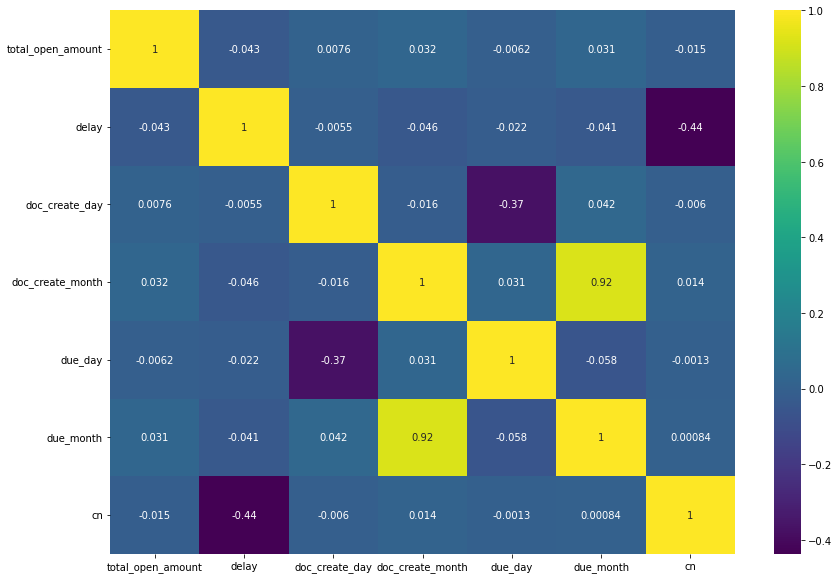

In [88]:
# # FEATURE SELECTION
plt.figure(figsize=(14,10))
cor = train_data.corr()
sns.heatmap(cor,cmap = 'viridis',annot=True)


In [89]:
# As we can see from the above graph due_month and doc_create_month are highly correlated and thus they will have a negative impact on our model. So drop remove due_month. 
x_train = x_train.drop(["due_month"], axis=1).copy()
x_val1 = x_val1.drop(["due_month"], axis=1).copy()
x_val2 = x_val2.drop(["due_month"], axis=1).copy()
x_test = x_test.drop(["due_month"], axis=1).copy()


In [90]:
# # MODELING

# As this is a regression model we will use the following models:-
# - Linear Regressor
# - SVR
# - Decision Tree
# - Random Forest
# - XgBoost

# ### XGBoost
#fitting the model 

clf = xgb.XGBRegressor()
clf.fit(x_train, y_train)

# Predicting the Validation Set Results
predicted = clf.predict(x_val1)

C:\Program Files\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [91]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, predicted), 2))
print("Accuracy= ", clf.score(x_val1,y_val1))

Mean absolute error = 1.97
Mean squared error = 15.64
Median absolute error = 1.08
Explain variance score = 0.61
R2 score = 0.6
Accuracy=  0.5989827541123862


C:\Program Files\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [92]:
# ### Random Forest
clf2 = RandomForestRegressor()
clf2.fit(x_train, y_train)

# Predicting the Validation Set Results
predicted2 = clf2.predict(x_val1)


In [93]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted2), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted2), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted2), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted2), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, predicted2), 2))
print("Accuracy= ", clf2.score(x_val1,y_val1))

Mean absolute error = 2.22
Mean squared error = 21.12
Median absolute error = 1.11
Explain variance score = 0.48
R2 score = 0.46
Accuracy=  0.4584983667944418


In [94]:
# Fitting Decision Tree Regressor to the Training Set
clf3 = DecisionTreeRegressor()
clf3.fit(x_train, y_train)

# Predicting the Validation Set Results
predicted3 = clf3.predict(x_val1)


In [95]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted3), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted3), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted3), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted3), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, predicted3), 2))
print("Accuracy= ", clf3.score(x_val1,y_val1))


Mean absolute error = 3.14
Mean squared error = 130.81
Median absolute error = 1.0
Explain variance score = -2.3
R2 score = -2.35
Accuracy=  -2.354028883120694


In [96]:
# ### LinearRegression
# Fitting Simple Linear Regression to the Training Set
clf5 = LinearRegression()
clf5.fit(x_train, y_train)

# Predicting the Test Set Results
predicted5 = clf.predict(x_val1)

C:\Program Files\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [97]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted5), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted5), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted5), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted5), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, predicted5), 2))
print("Accuracy= ", clf5.score(x_val1,y_val1))

Mean absolute error = 1.97
Mean squared error = 15.64
Median absolute error = 1.08
Explain variance score = 0.61
R2 score = 0.6
Accuracy=  0.26615900264634584


In [98]:
# #### We'll continue with XgBoost as it gives us the best result from all the other models.

# ### HYPER-PARAMETER TUNING
# now we will hypertune our parameters for better and accurate results and avoiding overfitting

# we will set some parameter
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}


In [99]:
reg=xgb.XGBRegressor()
random_search=RandomizedSearchCV(reg,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [100]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Program Files\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          reg_alpha=None, reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                   

In [101]:
#Checking for best parameters.
random_search.best_estimator_


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0.3, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.25, max_delta_step=0,
             max_depth=3, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [102]:
cl = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=8,
             min_child_weight=3, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
cl.fit(x_train, y_train)
# Predicting the Test Set Results
predicted = cl.predict(x_val2)

In [103]:
# predicting all types of error and accuracy

# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted5), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted5), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted5), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted5), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, predicted5), 2))
print("Accuracy= ", clf5.score(x_val1,y_val1))



Mean absolute error = 1.97
Mean squared error = 15.64
Median absolute error = 1.08
Explain variance score = 0.61
R2 score = 0.6
Accuracy=  0.26615900264634584


In [104]:
predicted1 = cl.predict(x_test)

C:\Program Files\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [105]:
predicted1=np.around(predicted1)
predicted1.astype(int)

array([ 1,  1,  0, ...,  2,  3, 52])

In [106]:
len(predicted1)

10000

In [107]:
# We got the delay on test set.
#Creating a new dataframe
Col=pd.DataFrame()

In [108]:
# Appending the delay predicted column in it
Delay=[]
for x in predicted1:
    Delay.append(pd.Timedelta(days=x))
Col['Delay'] = Delay
Col


,Delay
0,1 days
1,1 days
2,0 days
3,2 days
4,8 days
...,...
9995,3 days
9996,1 days
9997,2 days
9998,3 days


In [109]:
# Predicting the clear date

# In[119]:


Col['clear_date'] = ts['due_in_date']+Col['Delay']
Col


,Delay,clear_date
0,1 days,2020-03-14
1,1 days,2020-03-14
2,0 days,2020-03-13
3,2 days,2020-03-15
4,8 days,2020-05-10
...,...,...
9995,3 days,2020-06-02
9996,1 days,2020-06-02
9997,2 days,2020-06-04
9998,3 days,2020-05-22


In [110]:
aging_bucket = []
for x in predicted1:
    if x<=15:
        aging_bucket.append("0-15days")
    elif x<=30:
        aging_bucket.append("16-30days")
    elif x<=45:
        aging_bucket.append("31-45days")
    elif x<=60:
        aging_bucket.append("46-60days")
    else:
        aging_bucket.append("Greater than 60 days")
Col['Aging Bucket']= aging_bucket
Col.drop(['Delay'],axis=1,inplace=True)
Col

,clear_date,Aging Bucket
0,2020-03-14,0-15days
1,2020-03-14,0-15days
2,2020-03-13,0-15days
3,2020-03-15,0-15days
4,2020-05-10,0-15days
...,...,...
9995,2020-06-02,0-15days
9996,2020-06-02,0-15days
9997,2020-06-04,0-15days
9998,2020-05-22,0-15days


In [111]:
gd=pd.merge(df, Col,how = "outer")

In [112]:
# create excel writer object
writer = pd.ExcelWriter('C:\\Users\Hp\Downloads\highradiusprojectoutput.xlsx')
# write dataframe to excel
gd.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [113]:
print(gd)

       business_code cust_number        name_customer clear_date  \
0               U001  0200769623   WAL-MAR foundation 2019-01-09   
1               U001  0200769623   WAL-MAR foundation 2019-01-09   
2               U001  0200769623   WAL-MAR associates 2019-01-09   
3               U001  0200769623        WAL-MAR trust 2019-01-09   
4               U001  0200769623  WAL-MAR corporation 2019-01-09   
...              ...         ...                  ...        ...   
104334           NaN         NaN                  NaN 2020-08-16   
104335           NaN         NaN                  NaN 2020-07-12   
104336           NaN         NaN                  NaN 2020-07-17   
104337           NaN         NaN                  NaN 2020-08-14   
104338           NaN         NaN                  NaN 2020-08-12   

        buisness_year document_create_date.1 due_in_date invoice_currency  \
0              2019.0             2018-12-30  2019-01-14              USD   
1              2019.0        